# Ranking Data - Understanding the co-relation between keyword rankings with description or any other attribute.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('browser_rankings_data.csv')

data.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,16-12-2020,net.fast.web.browser,18-12-2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,16-12-2020,com.android.chrome,18-12-2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,16-12-2020,com.opera.browser,27-02-2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,16-12-2020,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [36]:
#getting info
data.columns

Index(['ID', 'Keyword', 'Rank', 'Country', 'Language', 'Date', 'App ID',
       'Date of Last Description Change', 'Short Description',
       'Long Description'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description                3066 non-null   object 
 9   Long Description                 3066 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 239.7+ KB


In [37]:
#describing the dataset
data.describe()

,ID,Rank
count,3066.000000,3050.000000
mean,57109.156230,15.155738
std,39290.651658,24.268403
min,1.000000,1.000000
25%,22484.000000,2.000000
50%,52427.000000,5.000000
75%,90683.750000,16.000000
max,131576.000000,134.000000


## Data Preprocessing

In [39]:
#Filling unranked keywords with 0
data["Rank"] = data.Rank.fillna(0).astype(int)
len(data.Rank)

3066

In [44]:
#creating a variable for categorical columns
categorical_cols = [cname for cname in data.columns  if data[cname].dtype == object]
print(f"Total categorical columns are {len(categorical_cols)}, They are {categorical_cols}")

Total categorical columns are 8, They are ['Keyword', 'Country', 'Language', 'Date', 'App ID', 'Date of Last Description Change', 'Short Description', 'Long Description']


In [45]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))    

In [46]:
#Display new balanced dataset
data.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,3,2,0,0,37,7,3,8,2
1,2,3,3,0,0,37,0,3,3,1
2,3,3,4,0,0,37,4,5,2,0
3,3,3,4,0,0,37,4,3,2,3
4,4,3,1,0,0,37,2,1,6,9


## Correlation Analysis

We will be using Spearman's rank correlation coefficient, its mathematical calculation.

Spearman rank correlation coefficient measures the monotonic relation between two variables. Its values range from `-1 to +1`

In [47]:
#Let us define a display_correlation() function that computes the correlation coefficient
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(r, vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

,ID,Keyword,Rank,Date,App ID,Date of Last Description Change,Short Description,Long Description
ID,1.000000,-0.000555,0.009758,-0.163787,0.002902,-0.001429,-0.008176,0.007000
Keyword,-0.000555,1.000000,-0.091987,-0.000207,0.073737,-0.035208,-0.205846,0.175301
Rank,0.009758,-0.091987,1.000000,0.005280,0.448163,0.159171,0.017396,0.043121
Date,-0.163787,-0.000207,0.005280,1.000000,-0.000130,0.000062,0.000362,-0.000308
App ID,0.002902,0.073737,0.448163,-0.000130,1.000000,0.166631,-0.140325,0.133509
Date of Last Description Change,-0.001429,-0.035208,0.159171,0.000062,0.166631,1.000000,0.125106,-0.441945
Short Description,-0.008176,-0.205846,0.017396,0.000362,-0.140325,0.125106,1.000000,-0.532480
Long Description,0.007000,0.175301,0.043121,-0.000308,0.133509,-0.441945,-0.532480,1.000000


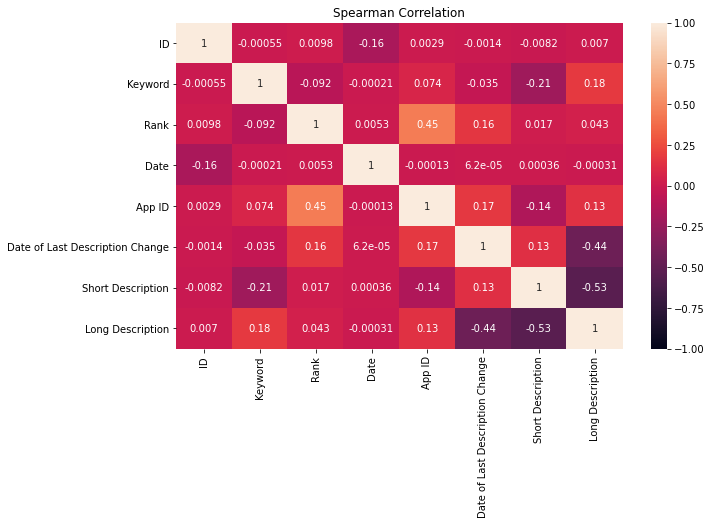

In [48]:
#Lets correlate dataset and visualize it using heatmap
#droping country and language features because of null values
display_correlation(data.drop(["Country","Language"], axis=1))

After corelating data we can figure out that is some negative corelating data present, but lets check corelation of individual features with ranking.

,Rank,Short Description
Rank,1.000000,0.017396
Short Description,0.017396,1.000000


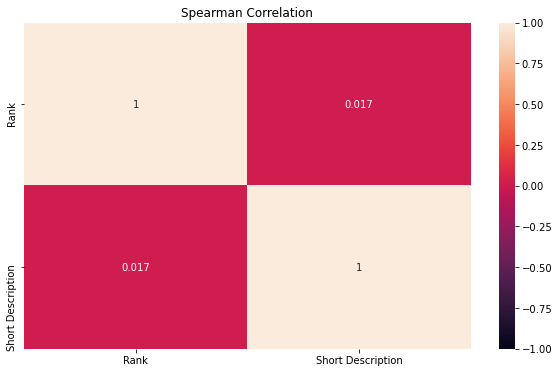

In [49]:
#Lets check the corellation between Short discription and rank
data_SD = data[["Rank","Short Description"]]
display_correlation(data_SD)

According to Spearman Rank Correlation method, the rank correlation coefficient measures the monotonic relation between `0` and `+2.0` which tells us that the features "Rank" and "Short Description" share a `Non-monotonic relation` which means "A non-monotonic function is where the increase in the value of one variable can sometimes lead to an increase and sometimes lead to a decrease in the value of the other variable".

,Rank,Long Description
Rank,1.000000,0.043121
Long Description,0.043121,1.000000


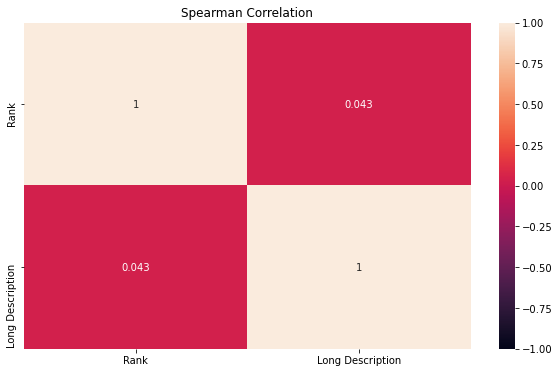

In [50]:
#Lets check the corellation between Lond discription and rank
data_LD = data[["Rank","Long Description"]]
display_correlation(data_LD)

According to Spearman Rank Correlation method, the rank correlation coefficient measures the monotonic relation between `0` and `+2.0` which tells us that the features "Rank" and "Long Description" share a `Non-monotonic relation` which means "A non-monotonic function is where the increase in the value of one variable can sometimes lead to an increase and sometimes lead to a decrease in the value of the other variable".

,Rank,App ID
Rank,1.000000,0.448163
App ID,0.448163,1.000000


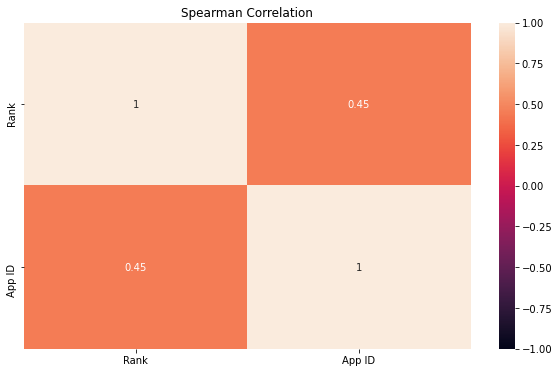

In [51]:
#Lets check the corellation between App Id  and rank
data_ID = data[["Rank","App ID"]]
display_correlation(data_ID)

According to Spearman Rank Correlation method, the rank correlation coefficient measures the monotonic relation between `+0.2` and `+0.8` which tells us that the features "Rank" and "Long Description" share a `Weak monotonically increasing relationship` which means "For a monotonically increasing function, as X increases, Y also increases (and it doesn't have to be linear)".

,Rank,Keyword
Rank,1.000000,-0.091987
Keyword,-0.091987,1.000000


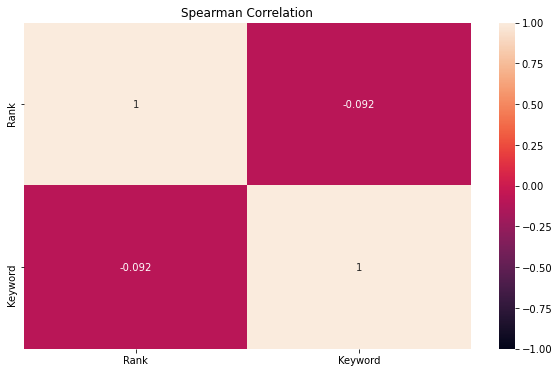

In [52]:
#Lets check the corellation between Keyword  and rank
data_KW = data[["Rank","Keyword"]]
display_correlation(data_KW)

According to Spearman Rank Correlation method, the rank correlation coefficient measures the monotonic relation between `0` and `-0.2` which tells us that the features "Rank" and "Long Description" share a `Weak monotonically decreasing relationship` which means "For a monotonically decreasing function, as one variable increases, the other one decreases (also doesn't have to be linear)".

# Questions:

## Q1. Is there any co-relation between short description, long description and ranking? Does the placement of keyword (for example - using a keyword in the first 10 words - have any co-relation with the ranking)?

A1. The co-relation between short description, long description and ranking very minimal when compared other features. But, as per Spearman Rank Correlation the relation between Long/Short discription is a Non-monotonic relation which suggests that increase or decrese of one variable can implement of increment or decrement of other. Here adding a keyword in the first 10 words may increse the corelation with the ranking. It's safe to say that 'discriptions' don't carry a huge impact on 'Ranking' compared to others.

## Q2. Does APP ID (Also known as package name) play any role in ranking?

A2. Comparing to all features 'APP ID' is highly correlated to 'Ranking', according to Spearman rank correlation coefficient it has 'Weak monotonically increasing relationship' which proves that if either of variable increases then other will increse as well. 'APP ID' plays an important part in deciding ranking.

## Q3. Any other pattern or good questions that you can think of and answer?

A3. A question arises " Why is 'APP ID' so highly co-related to 'Ranking' than other features? "
The answer to this might be, it's usage of 'keywords' in it. App ID uses keywords a lot more than the discriptions, that could be one of the reasons for it's high correlation rate. 